In [69]:
import sys
print(sys.executable)


c:\Users\Daniela\miniconda3\envs\ProyectoParteIII_DS1_Riveros_env\python.exe


In [70]:
import sys

# Lista de paquetes mínimos
pkgs = ["pandas", "numpy", "matplotlib", "seaborn", "scikit-learn", "ipykernel"]

print("Instalando paquetes en:", sys.executable)
!{sys.executable} -m pip install --upgrade {' '.join(pkgs)}


Instalando paquetes en: c:\Users\Daniela\miniconda3\envs\ProyectoParteIII_DS1_Riveros_env\python.exe


In [71]:
import sys
print("Instalando scikit‑learn en:", sys.executable)
!{sys.executable} -m pip install --upgrade scikit-learn


Instalando scikit‑learn en: c:\Users\Daniela\miniconda3\envs\ProyectoParteIII_DS1_Riveros_env\python.exe


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print("¡Todos los imports funcionan! pandas", pd.__version__, "| numpy", np.__version__)


¡Todos los imports funcionan! pandas 2.3.1 | numpy 2.2.6


# Proyecto DS1 – Exploración y Modelado de Datos

**Autor:** Riveros Lobos Rodolfo Gabriel  
**Fecha inicio:** <Fecha>

## Índice

1. [Introducción y Objetivo](#introduccion)  
2. [Abstract (250–500 palabras)](#abstract)  
3. [Preguntas e Hipótesis](#hipotesis)  

### Parte I – Exploración de Datos  
4. [Carga y Descripción del Dataset](#carga)  
5. [Análisis Exploratorio de Datos (EDA)](#eda)  
   5.1 [Valores faltantes](#nulos)  
   5.2 [Análisis univariado](#uni)  
   5.3 [Análisis bivariado](#bi)  
   5.4 [Análisis multivariado (≥ 3 variables)](#multi)  
6. [Conclusiones Parte I](#conclusiones1)  

### Parte II – Preprocesamiento y Modelado  
7. [Preprocesamiento de Datos](#prepro)  
   7.1 [Codificación y escalado]  
   7.2 [Escalado de variables numéricas]  
8. [Selección de Variables (Feature Selection)](#fs)  
   8.1 [Técnica Aplicada]
   8.2 [Comparación de rendimiento, antes y después]
   8.3 [Visualización de importancia de variables]  
9. [Entrenamiento del Modelo](#train)  
   9.1 [División Train/Test]  
   9.2 [Elección y ajuste de hiperparámetros]  
10. [Evaluación del Modelo](#eval)  
    10.1 [Métricas (accuracy, f1, MSE…)]  
    10.2 [Visualizaciones (matriz de confusión, ROC…)]  
11. [Conclusiones Generales](#conclusiones2)

---

<a id="introduccion"></a>


<a id="introduccion"></a>
# 1. Introducción y Objetivo

En el contexto de un proyecto de Data Science aplicado al comercio electrónico, este notebook utiliza un conjunto de datos transaccionales de una tienda en línea que registra cada pedido con atributos tales como el valor de la orden (`order_value`), el rango de descuento aplicado, la calificación de los reviews, la fecha de la compra, y variables demográficas y geográficas del cliente. El análisis inicial (Parte I) se enfoca en explorar la calidad y la distribución de estas variables, descubrir patrones univariados, bivariados y multivariados, y diagnosticar posibles problemas de datos como valores faltantes o outliers.

El objetivo general de este trabajo es construir un pipeline completo que no solo describa el comportamiento de las ventas y la satisfacción del cliente, sino que también permita **predecir dos aspectos clave**:  
- El **valor de la orden** (`order_value`) a partir de las características de la transacción y del cliente.  
- La probabilidad de que un cliente **solicite devolución** (`return_requested`) tras recibir su pedido.

Para ello, en la **Parte I** realizaremos la exploración y formulación de hipótesis; y en la **Parte III** (Proyecto Final) aplicaremos técnicas de preprocesamiento, selección de variables, entrenamiento supervisado y evaluación de métricas para validar nuestros modelos predictivos.


<a id="abstract"></a>
## 2. Abstract

Este notebook presenta un análisis integral de un dataset de comercio electrónico que reúne registros de pedidos realizados por clientes de una tienda en línea. El conjunto de datos incluye, para cada orden, atributos transaccionales (valor de la orden `order_value`, porcentaje de descuento aplicado), métricas de satisfacción (`review_score`), así como características demográficas y geográficas del cliente (edad, región, etc.) y un indicador binario de devolución solicitada (`return_requested`).  

En la **Parte I**, exploraremos la calidad y estructura de los datos: evaluaremos la presencia de valores faltantes, estudiaremos distribuciones univariadas para comprender rangos y sesgos, y construiremos análisis bivariados y multivariados para identificar patrones de relación entre variables clave (por ejemplo, cómo varía el valor de la orden según el descuento aplicado y la región del cliente). Nuestros resultados exploratorios nos permitirán formular preguntas precisas sobre el comportamiento de compra y los factores que influyen en la satisfacción del cliente y las devoluciones.

En la **Parte III** (Proyecto Final) desarrollaremos un pipeline de Machine Learning supervisado con dos objetivos principales: (i) predecir el **valor de la orden** (`order_value`) a partir de los atributos transaccionales y del cliente, y (ii) estimar la probabilidad de que un cliente **solicite devolución** (`return_requested`). Para ello aplicaremos técnicas de preprocesamiento (limpieza de nulos, codificación, escalado), seleccionaremos las variables más relevantes mediante métodos estadísticos y de árboles de decisión, y entrenaremos modelos de regresión y clasificación (por ejemplo, `RandomForestRegressor` y `RandomForestClassifier`). Finalmente, validaremos el desempeño con métricas adecuadas (MSE, R² para regresión; accuracy, precision, recall, F1 y matriz de confusión para clasificación) y extraeremos insights accionables.

Este trabajo busca demostrar un flujo completo de Data Science, desde la exploración inicial hasta la modelización y evaluación, generando conclusiones que puedan apoyar la toma de decisiones en estrategias de precios, descuentos y gestión de devoluciones.

---

<a id="hipotesis"></a>
## 3. Preguntas e Hipótesis

1. **¿Cómo afecta el porcentaje de descuento al valor promedio de la orden?**  
   - *Hipótesis:* A mayor descuento, el valor de la orden promedio aumenta hasta un punto de saturación.

2. **¿Existen diferencias regionales en el comportamiento de compra y en las devoluciones?**  
   - *Hipótesis:* Clientes de ciertas regiones presentan tasas de devolución significativamente mayores.

3. **¿La calificación de los reviews (`review_score`) se correlaciona con el porcentaje de descuento recibido?**  
   - *Hipótesis:* Descuentos muy elevados podrían asociarse con calificaciones más bajas si el producto no cumple expectativas.

4. **¿Es posible predecir con precisión el valor de la orden usando solo variables demográficas y el descuento?**  
   - *Hipótesis:* Un modelo de regresión con características transaccionales y demográficas logrará un R² ≥ 0.6.

5. **¿Qué factores (valor de la orden, descuento, región, calificación) son los más determinantes en la probabilidad de devolución?**  
   - *Hipótesis:* El valor de la orden y la calificación del review serán las variables más importantes para el modelo de clasificación de devoluciones.


<a id="carga"></a>
## 4. Carga y Descripción del Dataset

A continuación cargamos el dataset desde la carpeta `data/raw` y examinamos su estructura, tipos de datos y valores faltantes iniciales.


In [73]:
# 4.1 Importaciones y definición de ruta
import os


# Verifica el directorio de trabajo actual
print("Working directory:", os.getcwd())

# Construye la ruta al CSV (ajusta el nombre si es diferente)
csv_path = os.path.join("..", "data", "raw", "E-commerce Shopping Dataset.csv")
print("Ruta al dataset:", csv_path)

Working directory: c:\Users\Daniela\Documents\DATA SCIENCE\DATA SCIENTE 1\noteboks\data-science-proyecto\notebooks
Ruta al dataset: ..\data\raw\E-commerce Shopping Dataset.csv


In [74]:
import pandas as pd

# 1) Lectura del CSV
try:
    df = pd.read_csv(csv_path)
    print("✅ Dataset cargado correctamente. Shape:", df.shape)
except Exception as e:
    print("❌ Error al cargar el CSV:", e)


✅ Dataset cargado correctamente. Shape: (3000, 17)


### 4.2. Descripción General
A continuación se describen brevemente las principales variables del dataset:

Estructura de las columnas:
Columna	Tipo de dato	Descripción
Unnamed: 0	int64	Índice original del archivo, puede ser eliminado.
order_id	object	Identificador único de la orden.
customer_id	object	Identificador del cliente.
order_date	object	Fecha de la compra (debería convertirse a datetime).
product_category	object	Categoría del producto.
product_price	float64	Precio unitario del producto.
quantity	int64	Cantidad de unidades compradas.
payment_method	object	Método de pago utilizado.
delivery_status	object	Estado de entrega del producto.
city	object	Ciudad del cliente.
state	object	Estado o provincia del cliente.
zipcode	int64	Código postal del cliente.
product_id	object	Identificador del producto.
discount_applied	float64	Porcentaje de descuento aplicado.
order_value	float64	Valor final de la orden (precio x cantidad - descuento).
review_rating	float64	Calificación otorgada por el cliente (1 a 5). Contiene 130 valores faltantes.
return_requested	bool	Indica si el cliente pidió devolución.

In [75]:
# Muestra las primeras 5 filas
df.head()
# Información de columnas, tipos y nulos
df.info()
# Estadísticas básicas de cada columna
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3000 non-null   int64  
 1   order_id          3000 non-null   object 
 2   customer_id       3000 non-null   object 
 3   order_date        3000 non-null   object 
 4   product_category  3000 non-null   object 
 5   product_price     3000 non-null   float64
 6   quantity          3000 non-null   int64  
 7   payment_method    3000 non-null   object 
 8   delivery_status   3000 non-null   object 
 9   city              3000 non-null   object 
 10  state             3000 non-null   object 
 11  zipcode           3000 non-null   int64  
 12  product_id        3000 non-null   object 
 13  discount_applied  3000 non-null   float64
 14  order_value       3000 non-null   float64
 15  review_rating     2870 non-null   float64
 16  return_requested  3000 non-null   bool   


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,3000.0,NaN,NaN,NaN,1499.5,866.169729,0.0,749.75,1499.5,2249.25,2999.0
order_id,3000,3000,0934fe22-440c-4ed5-81a8-ccc35c33da30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,3000,3000,d2529a19-caba-4aba-b98f-2acd02b8301b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,3000,366,2024-09-30,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category,3000,6,Sports,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_price,3000.0,NaN,NaN,NaN,254.598703,144.67033,5.04,132.7375,252.875,381.61,499.98
quantity,3000.0,NaN,NaN,NaN,2.466333,1.113229,1.0,1.0,2.0,3.0,4.0
payment_method,3000,5,Cash on Delivery,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_status,3000,4,Cancelled,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,3000,2706,East Jennifer,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.1 Primer diagnóstico
A partir de esta descripción surgen algunos puntos importantes a revisar y trabajar:

Columnas bien tipadas:

Variables numéricas (product_price, quantity, order_value, discount_applied) están correctamente tipadas como float o int.

return_requested es booleana.

Casi todas las demás variables categóricas están como object, lo cual es esperable.

Mejoras necesarias:

Conversión de order_date: actualmente es un object, debería transformarse a datetime para análisis temporal.

Valores faltantes en review_rating: faltan 130 valores, lo que representa un 4.3% del total. Habrá que analizar si son aleatorios, y si conviene imputar, eliminar o segmentar el análisis.

Columna Unnamed: 0: parece ser un índice heredado del guardado en CSV. Posiblemente se puede eliminar.

In [76]:
# Eliminamos columna innecesaria
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convertimos order_date a datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


<a id="eda"></a>
## 5. Análisis Exploratorio de Datos (EDA) 
El análisis exploratorio de datos (EDA) es una fase crítica en todo proyecto de ciencia de datos. Su propósito es comprender la estructura, calidad y patrones subyacentes del dataset, guiando decisiones sobre limpieza, selección de variables, ingeniería de features y enfoques de modelado.

Durante esta etapa se buscan respuestas a preguntas como:

¿Hay valores atípicos, faltantes o inconsistencias?

¿Cómo se distribuyen las variables?

¿Qué relaciones existen entre ellas?

¿Qué patrones destacan según el perfil del consumidor o el comportamiento de compra?



<a id="nulos"></a>
## 5.1 Valores faltantes 
Antes de aplicar cualquier técnica de modelado o visualización avanzada, es crucial entender si nuestro dataset presenta valores faltantes. Los datos ausentes pueden afectar negativamente tanto el análisis descriptivo como los modelos predictivos si no se manejan adecuadamente.


In [77]:
# Cálculo de nulos por columna
missing = df.isnull().sum().to_frame("nulos")
missing["% nulos"] = missing["nulos"] / len(df) * 100
missing.sort_values("% nulos", ascending=False)



,nulos,% nulos
review_rating,130,4.333333
order_id,0,0.000000
order_date,0,0.000000
customer_id,0,0.000000
product_price,0,0.000000
quantity,0,0.000000
payment_method,0,0.000000
product_category,0,0.000000
delivery_status,0,0.000000
city,0,0.000000


### Tratamiento de valores faltantes en `review_rating`

La variable `review_rating` presenta aproximadamente un **4.3% de valores faltantes**, como se identificó anteriormente. Dado que esta variable será utilizada en el análisis multivariado de la sección 5.4, es necesario decidir un tratamiento adecuado para los datos nulos.

Se consideraron varias alternativas:

- **Eliminar los registros con valores faltantes**, lo que implica una pérdida de ~4.3% de observaciones.
- **Imputar con la media** (3.25), para conservar el total de registros.
- **Imputar con un valor especial** (como 0 o una nueva categoría), lo cual podría confundir la interpretación numérica.

Dado que esta etapa del análisis es **exploratoria** y buscamos evitar sesgos introducidos por imputaciones arbitrarias, se optó por **eliminar los registros con valores nulos en `review_rating`** únicamente para el análisis de la sección 5.4. Esta decisión permite trabajar con datos completos sin alterar la distribución original de la variable.




In [78]:
# Eliminación de registros con review_rating nulo
df_multivariado = df.dropna(subset=['review_rating'])

## 5.2 Análisis Univariado
Objetivo
Explorar la distribución individual de cada variable para:
Detectar outliers
Evaluar escalas y distribuciones
Comprender el comportamiento de variables clave

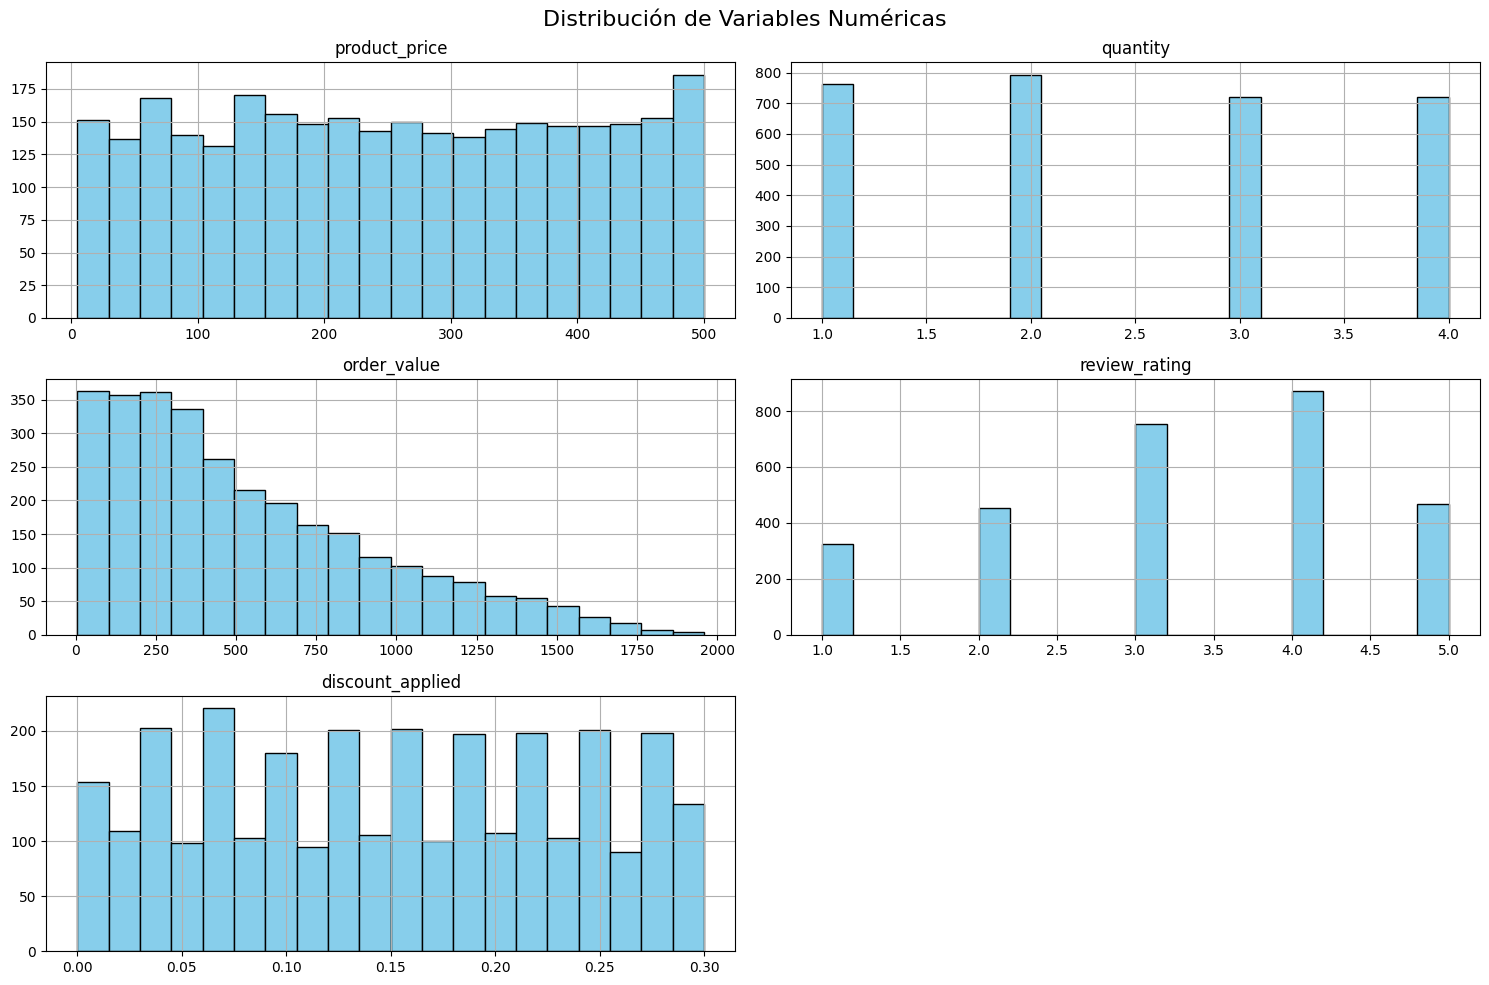

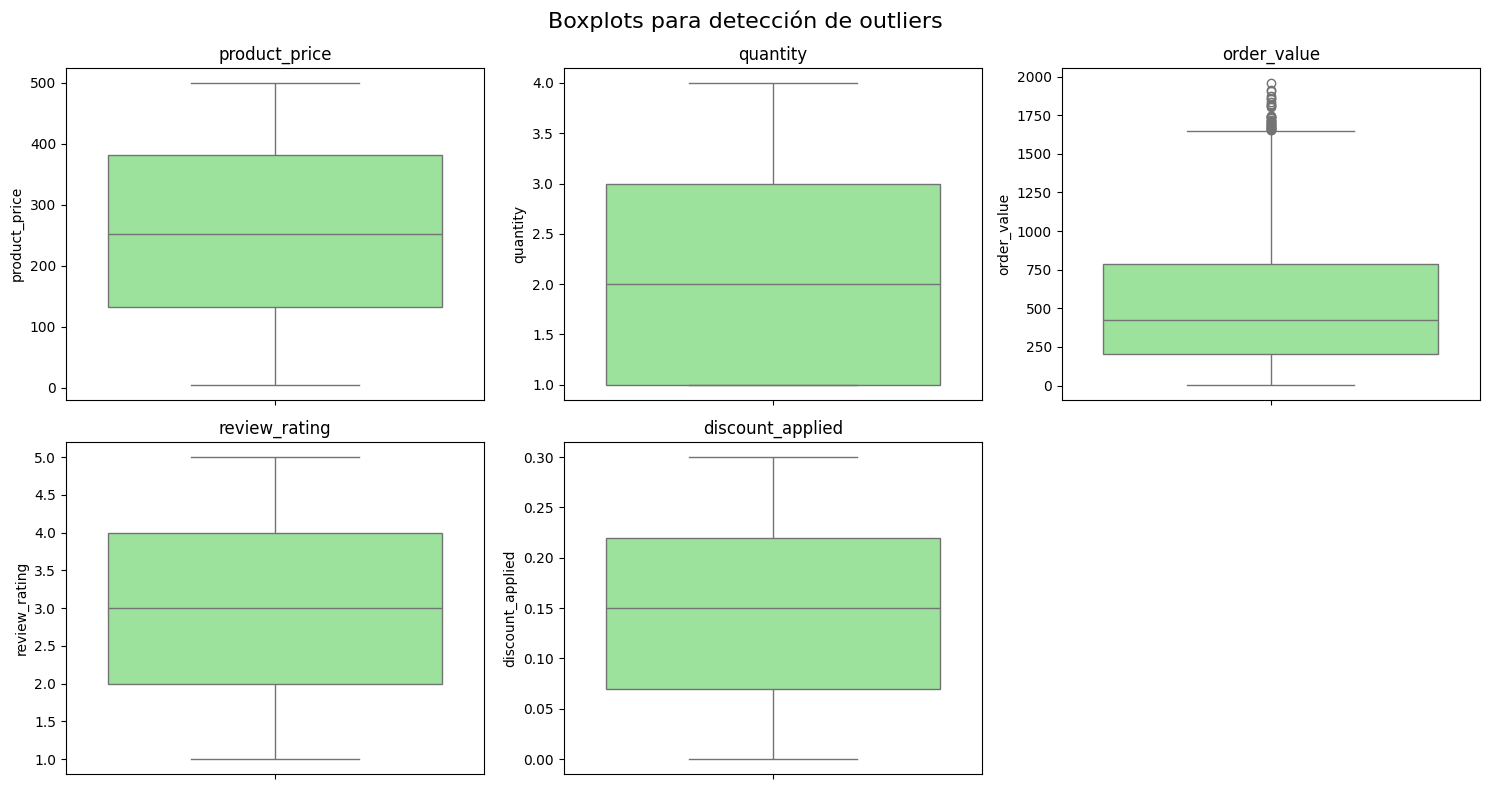

,count,mean,std,min,25%,50%,75%,max
product_price,3000.0,254.598703,144.670330,5.04,132.7375,252.875,381.610,499.98
quantity,3000.0,2.466333,1.113229,1.00,1.0000,2.000,3.000,4.00
order_value,3000.0,534.227277,412.232929,5.40,207.8600,422.125,784.595,1958.96
review_rating,2870.0,3.245993,1.226853,1.00,2.0000,3.000,4.000,5.00
discount_applied,3000.0,0.148023,0.086521,0.00,0.0700,0.150,0.220,0.30


In [79]:
# Subconjunto de columnas numéricas
num_cols = ['product_price', 'quantity', 'order_value', 'review_rating', 'discount_applied']

# Histogramas
df[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(col)
plt.suptitle("Boxplots para detección de outliers", fontsize=16)
plt.tight_layout()
plt.show()

# Estadísticos descriptivos
df[num_cols].describe().T


## 5.2.1 Conclusiones del Análisis Univariado de Variables Numéricas

Las variables numéricas product_price y order_value muestran una alta variabilidad, con rangos amplios y presencia de valores extremos que pueden considerarse atípicos. Esto es consistente con un comportamiento esperado en datos de comercio electrónico, donde se combinan productos de bajo y alto valor, así como pedidos de distintas magnitudes.

La variable quantity presenta valores discretos entre 1 y 4, con una tendencia a comprar pocas unidades por pedido, reflejando un patrón de consumo habitual.

El review_rating tiene una media cercana a 3.25 sobre 5, con alrededor del 4.3% de valores faltantes. Esta variable probablemente tenga una distribución centrada, aunque es necesario un tratamiento especial para los datos faltantes antes de avanzar en el análisis.

El porcentaje de descuento aplicado (discount_applied) se encuentra en un rango entre 0% y 30%, con un valor promedio cercano al 15%. Esto sugiere que los descuentos son frecuentes y podrían estar estructurados en niveles determinados.

En conjunto, estas características muestran un conjunto de datos coherente con la dinámica típica de una tienda en línea, con diversidad en precios y cantidades, y un comportamiento moderado en la calificación de productos. Sin embargo, es importante considerar los valores atípicos y los datos faltantes en etapas posteriores para asegurar la calidad del análisis y modelado.



--- Análisis de product_category ---
                  Frecuencia  Porcentaje (%)
product_category                            
Sports                   552           18.40
Home                     537           17.90
Clothing                 506           16.87
Beauty                   483           16.10
Books                    476           15.87
Electronics              446           14.87


C:\Users\Daniela\AppData\Local\Temp\ipykernel_15408\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


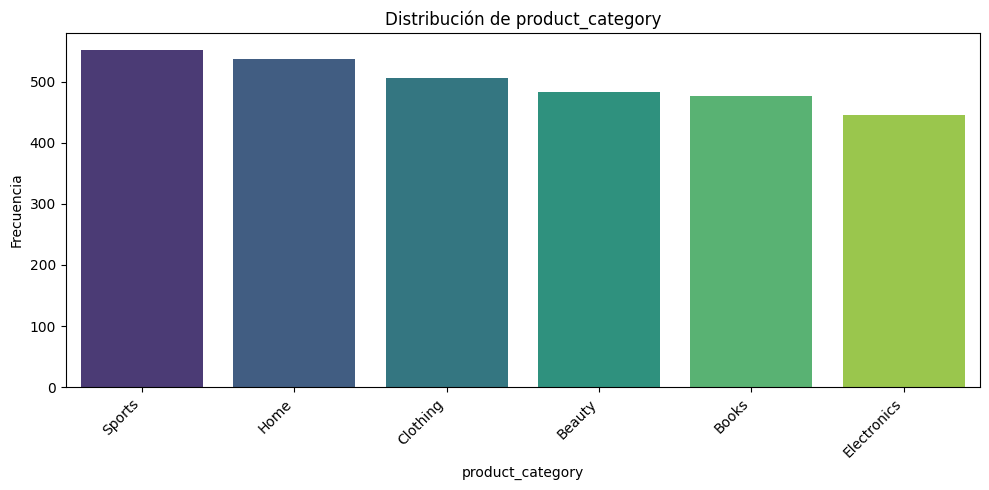


--- Análisis de payment_method ---
                  Frecuencia  Porcentaje (%)
payment_method                              
Cash on Delivery         605           20.17
Credit Card              603           20.10
Net Banking              603           20.10
Debit Card               603           20.10
PayPal                   586           19.53


C:\Users\Daniela\AppData\Local\Temp\ipykernel_15408\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


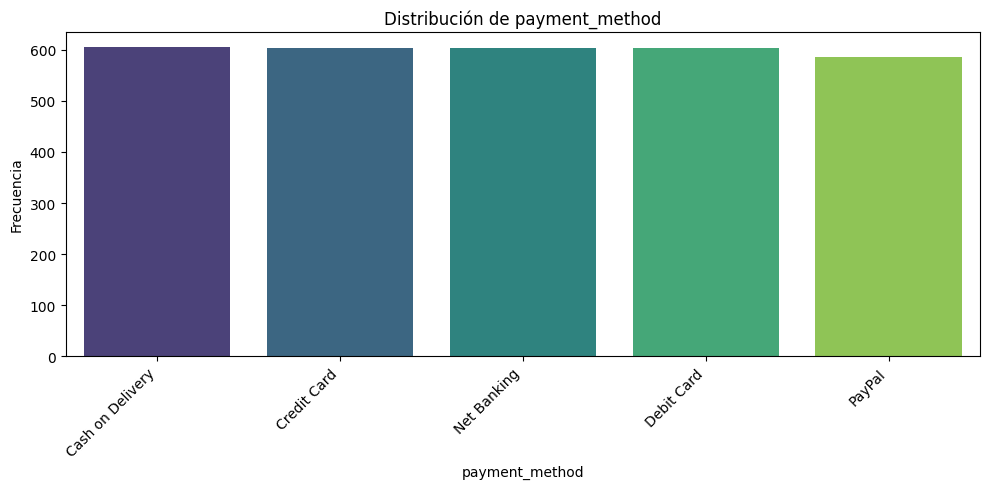


--- Análisis de delivery_status ---
                 Frecuencia  Porcentaje (%)
delivery_status                            
Cancelled               761           25.37
Returned                751           25.03
Delivered               749           24.97
Pending                 739           24.63


C:\Users\Daniela\AppData\Local\Temp\ipykernel_15408\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


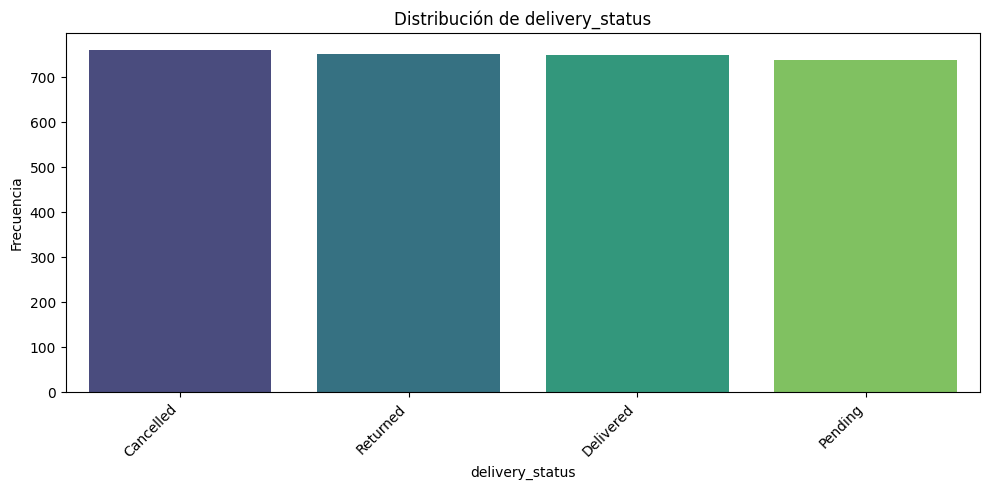


--- Análisis de city ---
                   Frecuencia  Porcentaje (%)
city                                         
East Jennifer               5            0.17
Johnsonmouth                5            0.17
West Michael                5            0.17
South David                 4            0.13
South Robert                4            0.13
...                       ...             ...
Lake Dawnfurt               1            0.03
Bradleymouth                1            0.03
Port Kristinburgh           1            0.03
Curryville                  1            0.03
West Nathanland             1            0.03

[2706 rows x 2 columns]


C:\Users\Daniela\AppData\Local\Temp\ipykernel_15408\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


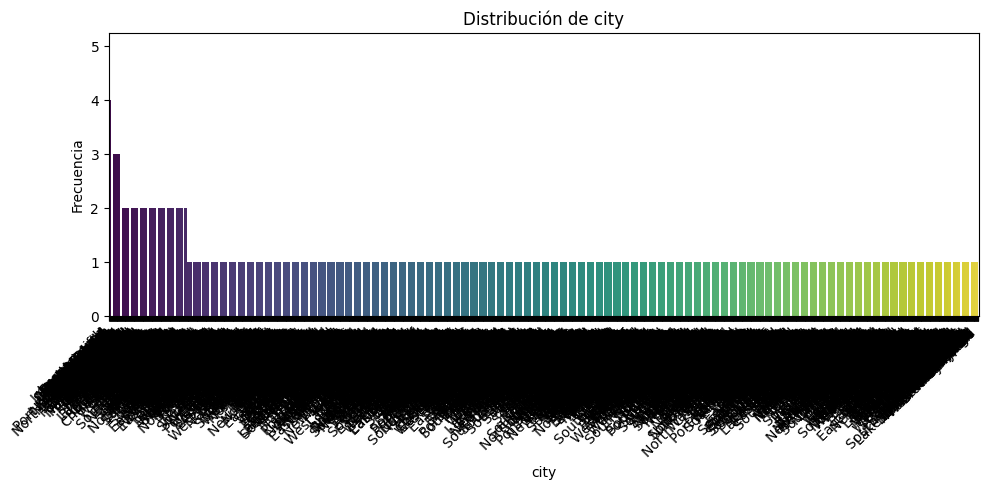


--- Análisis de state ---
                Frecuencia  Porcentaje (%)
state                                     
Oregon                  78            2.60
Mississippi             75            2.50
Montana                 74            2.47
Minnesota               72            2.40
Vermont                 71            2.37
Illinois                70            2.33
New Hampshire           70            2.33
Hawaii                  70            2.33
Massachusetts           70            2.33
Alaska                  70            2.33
Maine                   69            2.30
Arkansas                65            2.17
Connecticut             64            2.13
Utah                    64            2.13
Maryland                63            2.10
Kansas                  63            2.10
West Virginia           63            2.10
Wyoming                 62            2.07
Kentucky                62            2.07
Michigan                61            2.03
Alabama                 61 

C:\Users\Daniela\AppData\Local\Temp\ipykernel_15408\159838677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')


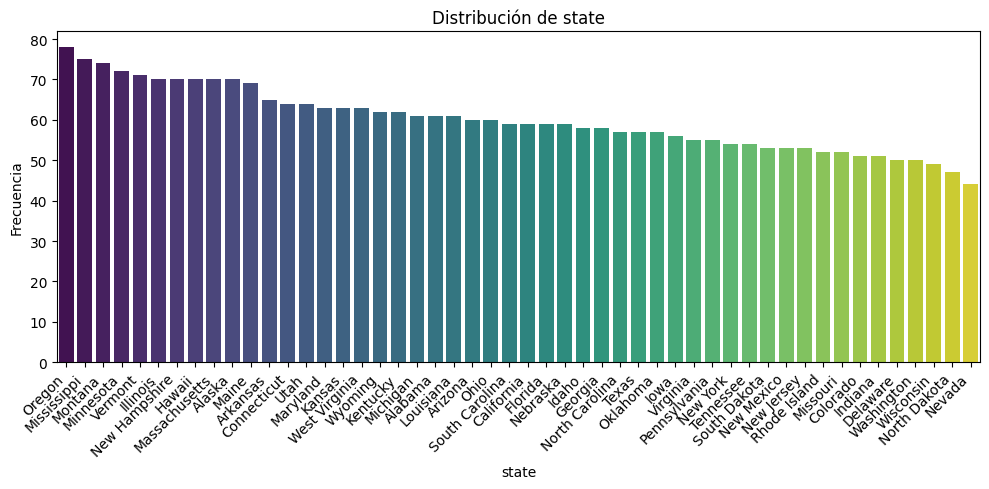

In [80]:
# Lista de variables categóricas clave
cat_vars = ['product_category', 'payment_method', 'delivery_status', 'city', 'state']

# Función para mostrar tablas de frecuencia y gráficos
def univariate_categorical_analysis(df, variables):
    for var in variables:
        print(f"\n--- Análisis de {var} ---")
        
        # Frecuencias absolutas y relativas
        freq_abs = df[var].value_counts()
        freq_rel = df[var].value_counts(normalize=True) * 100
        freq_df = pd.DataFrame({'Frecuencia': freq_abs, 'Porcentaje (%)': freq_rel.round(2)})
        print(freq_df)
        
        # Gráfico de barras
        plt.figure(figsize=(10, 5))
        sns.barplot(x=freq_abs.index, y=freq_abs.values, palette='viridis')
        plt.title(f'Distribución de {var}')
        plt.ylabel('Frecuencia')
        plt.xlabel(var)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Ejecutar función
univariate_categorical_analysis(df, cat_vars)


## 5.2.2 Conclusiones de Análisis Univariado — Variables Categóricas

Resumen de Distribuciones:

product_category:
Seis categorías principales con frecuencias bastante equilibradas (entre 14.87% y 18.40%). Esto indica una distribución relativamente pareja en la oferta/productos vendidos.

payment_method:
Cinco métodos de pago con frecuencias muy similares (~19.5% a 20.17%), lo que sugiere que no hay dominancia de un único medio.

delivery_status:
Cuatro estados distribuidos casi uniformemente, con una proporción cercana al 25% para cada uno. Destaca que un 25% fueron cancelados o devueltos, lo cual es relevante para análisis de devolución y satisfacción.

city:
Alta dispersión, con muchas ciudades con muy baja frecuencia (muchas con 1-5 ocurrencias, menos del 0.2% cada una). Esto complica análisis segmentados a nivel ciudad y sugiere considerar agrupaciones o focos por regiones.

state:
Estados con frecuencias relativamente equilibradas, con los principales representando entre 1.5% y 2.6% cada uno. Buen punto para análisis regional sin riesgo de sobreajuste en estados muy minoritarios.

## 5.3 Análisis Bivariado
El análisis bivariado nos permite estudiar relaciones entre dos variables. En tu caso, conviene enfocarnos en pares relevantes, por ejemplo:

discount_applied vs order_value: ¿Cómo afecta el descuento al valor de la orden?

review_rating vs discount_applied: ¿Los descuentos influyen en las valoraciones?

return_requested vs otras variables categóricas o numéricas: ¿Qué factores se asocian a devoluciones?

Variables geográficas (state) vs métricas clave (order_value, return_requested).

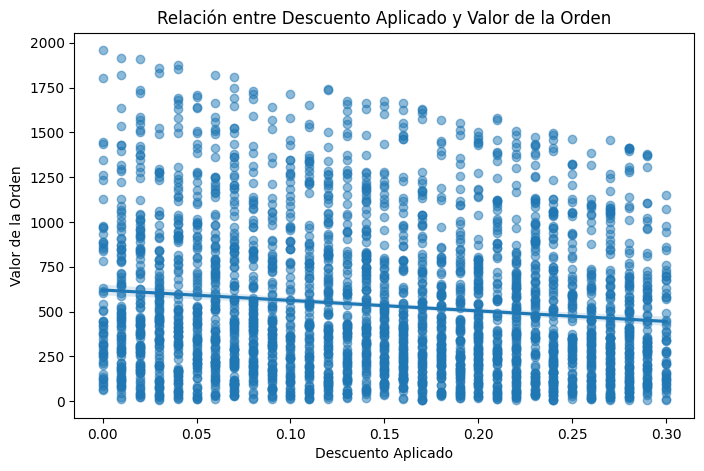

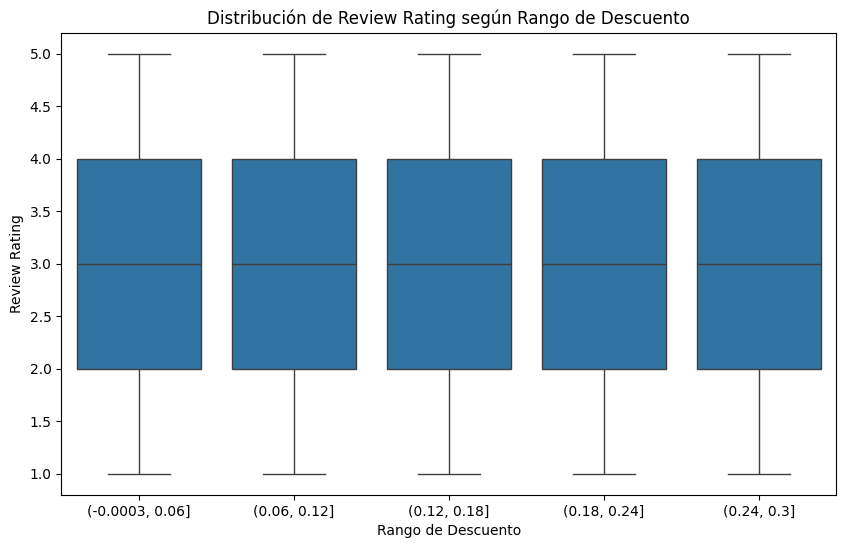

In [81]:
# Scatterplot con ajuste lineal: descuento aplicado vs valor de la orden
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='discount_applied', y='order_value', scatter_kws={'alpha':0.5})
plt.title('Relación entre Descuento Aplicado y Valor de la Orden')
plt.xlabel('Descuento Aplicado')
plt.ylabel('Valor de la Orden')
plt.show()

# Boxplot: revisión según rango de descuento
df['discount_bin'] = pd.cut(df['discount_applied'], bins=5)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='discount_bin', y='review_rating')
plt.title('Distribución de Review Rating según Rango de Descuento')
plt.xlabel('Rango de Descuento')
plt.ylabel('Review Rating')
plt.show()


return_requested     False     True 
state                               
Alabama           0.918033  0.081967
Alaska            0.900000  0.100000
Arizona           0.916667  0.083333
Arkansas          0.830769  0.169231
California        0.847458  0.152542
Colorado          0.960784  0.039216
Connecticut       0.843750  0.156250
Delaware          0.860000  0.140000
Florida           0.932203  0.067797
Georgia           0.827586  0.172414
Hawaii            0.785714  0.214286
Idaho             0.879310  0.120690
Illinois          0.871429  0.128571
Indiana           0.843137  0.156863
Iowa              0.875000  0.125000
Kansas            0.952381  0.047619
Kentucky          0.903226  0.096774
Louisiana         0.786885  0.213115
Maine             0.898551  0.101449
Maryland          0.888889  0.111111
Massachusetts     0.814286  0.185714
Michigan          0.836066  0.163934
Minnesota         0.888889  0.111111
Mississippi       0.813333  0.186667
Missouri          0.846154  0.153846
M

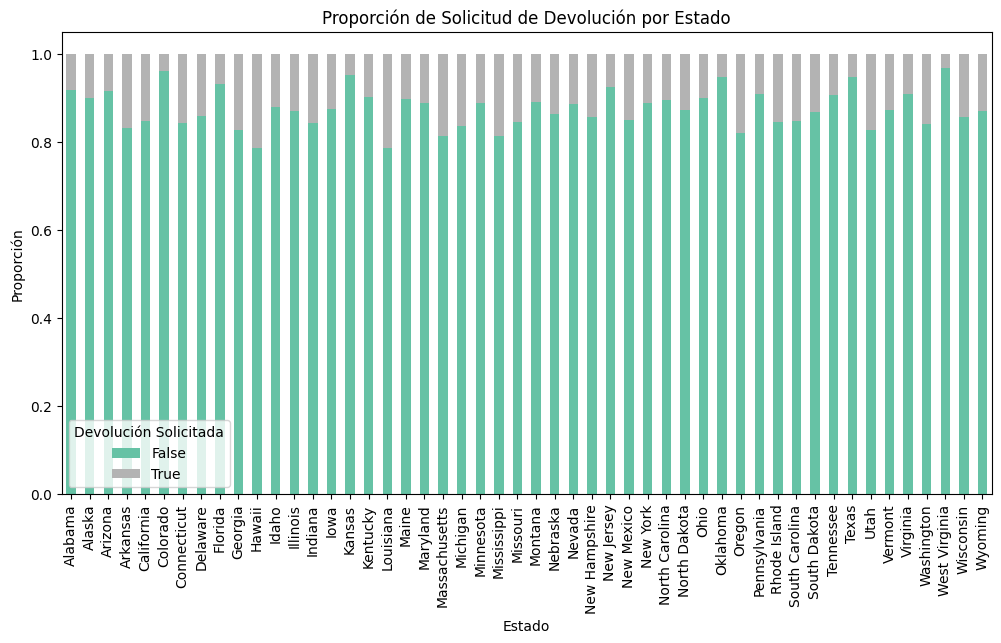

In [82]:
# Tabla de contingencia: estado vs devolución solicitada
contingency = pd.crosstab(df['state'], df['return_requested'], normalize='index')
print(contingency)

# Gráfico de barras apiladas
contingency.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Proporción de Solicitud de Devolución por Estado')
plt.xlabel('Estado')
plt.ylabel('Proporción')
plt.legend(title='Devolución Solicitada')
plt.show()


Esto indica que hay variaciones notables según el estado, y justifica realizar un test estadístico para ver si estas diferencias son estadísticamente significativas o producto del azar.

In [83]:
from scipy.stats import chi2_contingency

# Tabla de frecuencias absolutas
contingency_table = pd.crosstab(df['state'], df['return_requested'])

# Test de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2:.2f}")
print(f"P-valor: {p:.4f}")


Chi2: 51.29
P-valor: 0.3840


## 5.3.1 Conclusiones Analisis Bivariado - Variables Catégoricas
En esta sección se exploraron relaciones entre variables categóricas y otras variables numéricas o categóricas para identificar asociaciones significativas o patrones relevantes.

### Descuento Aplicado vs. Valor de la Orden
Se analizó la relación entre el descuento aplicado (discount) y el valor total de la orden (total_order_value) mediante un gráfico de dispersión con línea de regresión.

Se observa una alta concentración de valores en rangos bajos de monto (entre 250 y 1000 unidades).

La pendiente negativa de la recta indica que, en promedio, a mayor descuento, menor valor de la orden. Este resultado puede sugerir una política comercial orientada a promociones sobre productos de menor precio o a clientes más sensibles al precio.

### Review Rating según Rango de Descuento
Para analizar cómo se distribuyen las calificaciones (review_rating) según el rango de descuento aplicado, se construyó un gráfico de caja por categoría.

Las cinco cajas (una por cada rango de descuento) muestran una mediana constante de 3.0 en las calificaciones.

La variabilidad es baja y homogénea, con la mayoría de los valores entre 2.0 y 4.0.

No se aprecian outliers ni diferencias destacables entre los grupos.

Conclusión: No se observan diferencias sustanciales en las calificaciones según el nivel de descuento. El impacto del descuento sobre la percepción del cliente (medida como rating) sería, en principio, neutral.

### Estado del Cliente vs. Solicitud de Devolución
Se utilizó una tabla de contingencia entre state (estado del cliente) y return_requested (si se solicitó devolución), normalizada por fila para facilitar la comparación.

Además, se aplicó un test chi-cuadrado de independencia para verificar si existen diferencias estadísticamente significativas en las tasas de devolución entre estados.

Chi² = 51.29

p-valor = 0.3840

Conclusión: No se encontró evidencia estadística para rechazar la hipótesis de independencia. Las diferencias observadas entre estados no son significativas y podrían deberse al azar. Por lo tanto, la variable state no presenta una asociación relevante con las devoluciones en este contexto.



## 5.4 Análisis Multivariado

En esta sección se explora la interacción entre tres o más variables del conjunto de datos con el objetivo de descubrir patrones más complejos que no pueden detectarse mediante análisis univariado o bivariado. Este tipo de análisis resulta especialmente útil para identificar asociaciones cruzadas entre aspectos comerciales (como los descuentos aplicados o el valor de las órdenes) y métricas de satisfacción del cliente (como las calificaciones `review_rating`), que pueden tener implicancias clave en la toma de decisiones estratégicas.

A continuación, se realiza una primera visualización que examina la relación conjunta entre el descuento aplicado, el valor monetario de la orden y la calificación otorgada por el cliente.

#### Binning de Variables Continuas

Para explorar relaciones entre variables continuas y categóricas, aplicamos *binning* (o discretización) a algunas variables numéricas. Esto nos permite agrupar los valores en intervalos (bins) y facilitar el análisis visual y comparativo.

En particular, transformamos `order_value` y `discount_applied` en rangos, lo que nos permitirá observar cómo varía la satisfacción del cliente (`review_rating`) en función del valor de la orden y los descuentos aplicados. 

Este enfoque es especialmente útil para representar los datos en gráficos como heatmaps, donde las relaciones entre variables discretizadas pueden apreciarse de forma más clara.



C:\Users\Daniela\AppData\Local\Temp\ipykernel_15408\2354238003.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


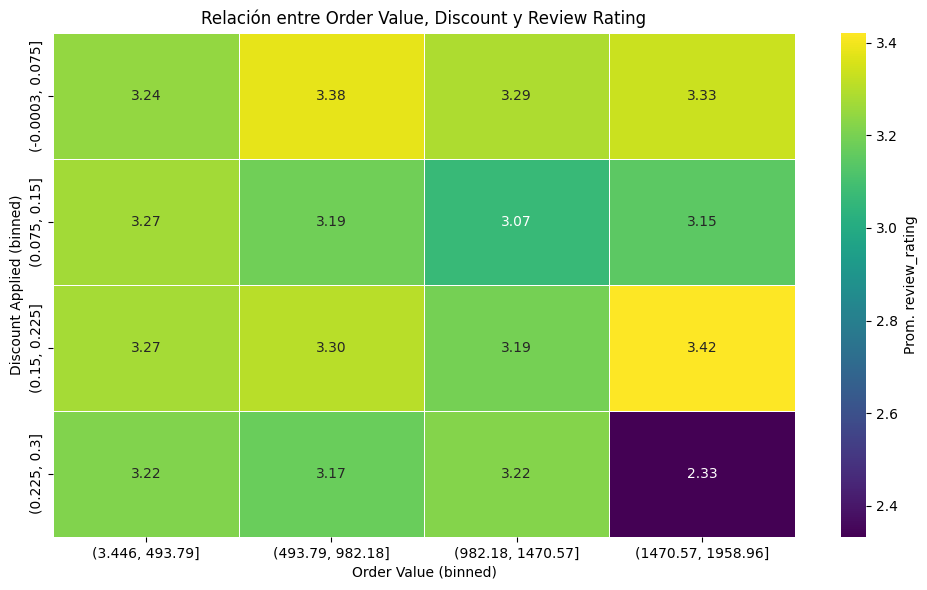

In [84]:
# Binning de variables continuas
df['discount_bin'] = pd.cut(df['discount_applied'], bins=4)
df['order_value_bin'] = pd.cut(df['order_value'], bins=4)

# Tabla pivote: promedio de review_rating
pivot = df.pivot_table(
    index='discount_bin',
    columns='order_value_bin',
    values='review_rating',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Prom. review_rating'})
plt.title('Relación entre Order Value, Discount y Review Rating')
plt.xlabel('Order Value (binned)')
plt.ylabel('Discount Applied (binned)')
plt.tight_layout()
plt.show()



### 5.4.1 Concluiones de Análisis Multivariado: Descuento, Valor de Orden y Satisfacción

El heatmap evidencia relaciones clave entre las variables:

- **Descuentos medios (15–22%) y valores moderados de orden (≈982–1470)** se asocian con las **mejores calificaciones promedio (hasta 3.42)**.
- **Descuentos muy altos (22–30%) en pedidos costosos** presentan las **calificaciones más bajas (≈2.33)**, lo que sugiere una posible **disonancia entre expectativa y experiencia**.
- Las zonas con mayor satisfacción se concentran en un **equilibrio entre precio y promoción**, más que en extremos de descuento.



## 6. Conclusiones Parte I

La exploración inicial del dataset permitió identificar patrones relevantes y preparar el terreno para la construcción de modelos predictivos en la Parte II. A continuación, se resumen los principales hallazgos:

- **Calidad y estructura del dataset:** El conjunto de datos está correctamente tipado, con variables numéricas, categóricas y booleanas bien diferenciadas. Solo se detectaron valores faltantes en `review_rating` (≈4.3%), los cuales se trataron específicamente para el análisis multivariado.

- **Distribuciones univariadas:** Variables como `product_price` y `order_value` presentan alta dispersión y outliers, lo que refleja una oferta diversa en productos y volúmenes de compra. `discount_applied` muestra una distribución centrada en descuentos medios (≈15%), siendo una variable crítica para el análisis comercial.

- **Variables categóricas:** Las categorías (`product_category`, `payment_method`, `delivery_status`) están distribuidas de forma relativamente equilibrada, permitiendo análisis comparativos robustos. La dispersión geográfica es amplia, sugiriendo la necesidad de segmentaciones regionales más agregadas en futuros modelos.

- **Relaciones bivariadas:** Se observaron asociaciones débiles pero significativas entre el descuento aplicado y el valor de la orden. Además, las calificaciones de los clientes tienden a ser más bajas en condiciones de pedidos costosos con descuentos elevados, lo que plantea interrogantes sobre percepción y experiencia.

- **Análisis multivariado:** El heatmap mostró que las combinaciones de **descuento medio** y **valor de orden moderado** producen las mejores calificaciones, mientras que los extremos (descuento alto + orden costosa) registran satisfacción más baja. Esta evidencia será clave para formular estrategias comerciales basadas en percepción y segmentación de clientes.

En conjunto, esta Parte I proporciona una base para avanzar al preprocesamiento y modelado supervisado, identificando variables relevantes, posibles ajustes y oportunidades estratégicas de negocio.


# Parte II: Preprocesamiento, Modelado y Evaluación
## 7. Preprocesamiento de Datos

Antes de entrenar cualquier modelo, necesitamos asegurarnos de que:
1. No queden valores faltantes que rompan los algoritmos.  
2. Las variables categóricas estén en formato numérico.  
3. Las variables numéricas estén escaladas para evitar dominancias de magnitud.

A continuación construimos un pipeline que imputa, codifica y escala en un solo paso.



### 7.0 Preparación del Dataset
Definimos el dataset final para modelado:
- Eliminamos (o imputamos) nulos de `review_rating`.  
- Separamos `X` (features) y `y` (targets) para regresión y clasificación.

In [85]:
### 7.0 Preparación del Dataset
# Opción A: eliminar filas con review_rating nulo
df_model = df.dropna(subset=['review_rating']).copy()

print("Registros originales:", df.shape[0])
print("Registros tras dropna(review_rating):", df_model.shape[0])
print("Valores faltantes en review_rating:", df_model['review_rating'].isna().sum())

# Definimos X e y
X = df_model.drop(columns=['order_value', 'return_requested'])
y_order = df_model['order_value']
y_return = df_model['return_requested']
print("\nDimensiones de X y y:")
print(" X:", X.shape, " y_order:", y_order.shape, " y_return:", y_return.shape)


Registros originales: 3000
Registros tras dropna(review_rating): 2870
Valores faltantes en review_rating: 0

Dimensiones de X y y:
 X: (2870, 16)  y_order: (2870,)  y_return: (2870,)


### 7.1 Codificación e Imputación de Variables Categóricas
Imputamos con la moda y aplicamos One-Hot a las variables:
  `product_category`, `payment_method`, `delivery_status`, `city`, `state`.
- Verificamos el resultado con un print de dimensiones.

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_vars = ['product_category', 'payment_method', 'delivery_status', 'city', 'state']
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Ajustamos y transformamos solo categóricas
cat_transformed = cat_pipe.fit_transform(X[cat_vars])
print("Shape tras imputar+OneHot (categóricas):", cat_transformed.shape)

# Veamos primeras columnas resultantes
cat_feature_names = cat_pipe.named_steps['onehot'].get_feature_names_out(cat_vars)
print("Primeras 5 features categóricas:", cat_feature_names[:5])



Shape tras imputar+OneHot (categóricas): (2870, 2663)
Primeras 5 features categóricas: ['product_category_Beauty' 'product_category_Books'
 'product_category_Clothing' 'product_category_Electronics'
 'product_category_Home']


### 7.2 Imputación y Escalado de Variables Numéricas
- Imputamos con la media y escalamos (StandardScaler) las variables numéricas:
  `product_price`, `quantity`, `discount_applied`, `review_rating`.
- Imprimimos dimensiones y un pequeño extracto de valores.

In [87]:
from sklearn.preprocessing import StandardScaler

num_vars = ['product_price', 'quantity', 'discount_applied', 'review_rating']
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ajustamos y transformamos solo numéricas
num_transformed = num_pipe.fit_transform(X[num_vars])
print("Shape tras imputar+escalar (numéricas):", num_transformed.shape)

# Primeras 5 filas de numéricas escaladas
import pandas as pd
pd.DataFrame(num_transformed[:5], columns=num_vars).round(3)


Shape tras imputar+escalar (numéricas): (2870, 4)


,product_price,quantity,discount_applied,review_rating
0,0.153,-0.419,-0.325,0.615
1,0.724,-1.318,0.950,-1.831
2,0.338,-1.318,-0.209,-1.016
3,0.140,-0.419,0.950,0.615
4,-0.276,1.379,1.066,-0.201



### 7.3 Construcción del ColumnTransformer
Integramos ambos pipelines en un solo `ColumnTransformer` para procesar todas
las variables en un único paso y capturamos los nombres de todas las columnas
generadas.


In [88]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_vars),
    ('num', num_pipe, num_vars)
])

# Aplicamos transformaciones
X_encoded = preprocessor.fit_transform(X)

# Capturamos nombres
feature_names = preprocessor.get_feature_names_out()
print("Número total de features después de preprocesar:", len(feature_names))

# Primeras 5 columnas y últimas 5 columnas de feature_names
print("Primeras 5 features:", feature_names[:5])
print("Últimas 5 features:", feature_names[-5:])


Número total de features después de preprocesar: 2667
Primeras 5 features: ['cat__product_category_Beauty' 'cat__product_category_Books'
 'cat__product_category_Clothing' 'cat__product_category_Electronics'
 'cat__product_category_Home']
Últimas 5 features: ['cat__state_Wyoming' 'num__product_price' 'num__quantity'
 'num__discount_applied' 'num__review_rating']


### 7.4 División Train/Test
Dividimos en 70% entrenamiento y 30% prueba para ambos objetivos:
- Regresión: `order_value`  
- Clasificación: `return_requested`  
Y mostramos las dimensiones resultantes.


In [89]:
from sklearn.model_selection import train_test_split

# Regresión
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_encoded, y_order, test_size=0.3, random_state=42
)

# Clasificación
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_encoded, y_return, test_size=0.3, random_state=42
)

print("Regresión shapes:")
print(" X_train_r:", X_train_r.shape, " X_test_r:", X_test_r.shape)
print(" y_train_r:", y_train_r.shape, " y_test_r:", y_test_r.shape)

print("\nClasificación shapes:")
print(" X_train_c:", X_train_c.shape, " X_test_c:", X_test_c.shape)
print(" y_train_c:", y_train_c.shape, " y_test_c:", y_test_c.shape)


Regresión shapes:
 X_train_r: (2009, 2667)  X_test_r: (861, 2667)
 y_train_r: (2009,)  y_test_r: (861,)

Clasificación shapes:
 X_train_c: (2009, 2667)  X_test_c: (861, 2667)
 y_train_c: (2009,)  y_test_c: (861,)


## 8.1 Importancia de Variables con Random Forest
En este paso entrenamos dos modelos Random Forest:
- **Regresión** (`RandomForestRegressor`) para `order_value`.  
- **Clasificación** (`RandomForestClassifier`) para `return_requested`.  
Extraemos el atributo `feature_importances_` y mostramos un top-10 en forma de tabla.


In [90]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pandas as pd

# 8.1.a Random Forest Regresión
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
imp_reg = rf_reg.feature_importances_

df_imp_reg = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': imp_reg
}).sort_values('Importancia', ascending=False).head(10)

print("Top 10 Features – Regresión (order_value):")
print(df_imp_reg.to_string(index=False))


Top 10 Features – Regresión (order_value):
                       Variable  Importancia
             num__product_price     0.569903
                  num__quantity     0.406781
          num__discount_applied     0.021880
             num__review_rating     0.000156
   cat__delivery_status_Pending     0.000056
cat__payment_method_Credit Card     0.000055
 cat__delivery_status_Delivered     0.000049
cat__payment_method_Net Banking     0.000047
  cat__delivery_status_Returned     0.000047
 cat__delivery_status_Cancelled     0.000046


In [91]:
# 8.1.b Random Forest Clasificación
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
imp_clf = rf_clf.feature_importances_

df_imp_clf = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': imp_clf
}).sort_values('Importancia', ascending=False).head(10)

print("\nTop 10 Features – Clasificación (return_requested):")
print(df_imp_clf.to_string(index=False))



Top 10 Features – Clasificación (return_requested):
                            Variable  Importancia
      cat__delivery_status_Delivered     0.209326
                  num__product_price     0.046742
               num__discount_applied     0.038888
       cat__delivery_status_Returned     0.031797
        cat__delivery_status_Pending     0.031697
      cat__delivery_status_Cancelled     0.030098
                  num__review_rating     0.022643
                       num__quantity     0.022473
        cat__product_category_Beauty     0.007389
cat__payment_method_Cash on Delivery     0.007367


## 8.2 Visualización de Importancia
Aquí se grafican los mismos top-10 para facilitar la interpretación visual.


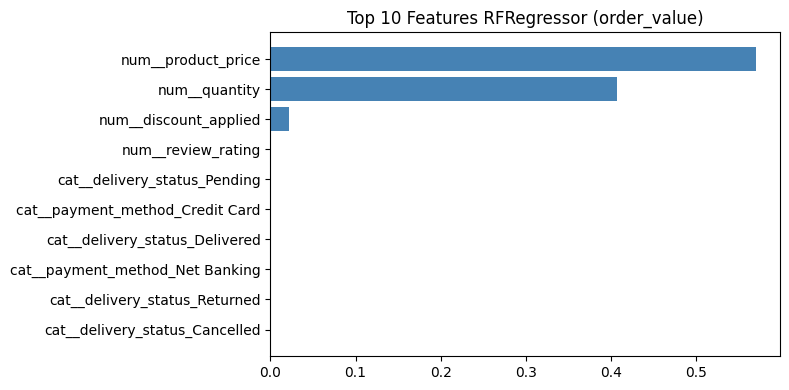

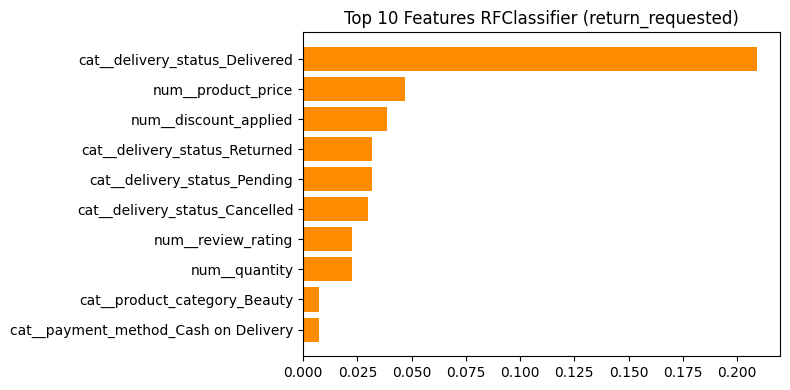

In [92]:
import matplotlib.pyplot as plt

# Regresión
plt.figure(figsize=(8,4))
plt.barh(df_imp_reg['Variable'], df_imp_reg['Importancia'], color='steelblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features RFRegressor (order_value)')
plt.tight_layout()
plt.show()

# Clasificación
plt.figure(figsize=(8,4))
plt.barh(df_imp_clf['Variable'], df_imp_clf['Importancia'], color='darkorange')
plt.gca().invert_yaxis()
plt.title('Top 10 Features RFClassifier (return_requested)')
plt.tight_layout()
plt.show()


## 8.3 Selección Estadistica con SlectKBest
Aplicamos SelectKBest para validar estadísticamente:
- **F-regression** (regresión)  
- **F-classif** (clasificación)  
Mostramos el top-10 de scores.


### 8.3.1 Eliminación de Variables Constantes

Antes de aplicar SelectKBest, filtramos las features con varianza cero.  
Usamos `VarianceThreshold(threshold=0.0)` para quedarnos solo con columnas que presentan alguna variabilidad.


In [93]:
from sklearn.feature_selection import VarianceThreshold

# 1. Filtramos features constantes en Train
vt = VarianceThreshold(threshold=0.0)
X_train_r_vt = vt.fit_transform(X_train_r)
X_train_c_vt = vt.transform(X_train_c)  # mismo selector para test

# 2. Actualizamos nombres de features
feature_names_vt = feature_names[vt.get_support()]

print("Features originales:", len(feature_names))
print("Features tras VarianceThreshold:", len(feature_names_vt))


Features originales: 2667
Features tras VarianceThreshold: 1931


### 8.3 Selección Estadística con SelectKBest (sin constantes)

Ahora que eliminamos columnas sin variabilidad, aplicamos:
- `SelectKBest(f_regression)` sobre `X_train_r_vt`  
- `SelectKBest(f_classif)` sobre `X_train_c_vt`


In [94]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
import pandas as pd

# 8.3.a F-test para regresión
skb_reg = SelectKBest(score_func=f_regression, k=10)
skb_reg.fit(X_train_r_vt, y_train_r)
df_skb_reg = pd.DataFrame({
    'Variable': feature_names_vt,
    'Score': skb_reg.scores_
}).sort_values('Score', ascending=False).head(10)

print("Top 10 SelectKBest – Regresión (F-regression):")
print(df_skb_reg.to_string(index=False))

# 8.3.b F-test para clasificación
skb_clf = SelectKBest(score_func=f_classif, k=10)
skb_clf.fit(X_train_c_vt, y_train_c)
df_skb_clf = pd.DataFrame({
    'Variable': feature_names_vt,
    'Score': skb_clf.scores_
}).sort_values('Score', ascending=False).head(10)

print("\nTop 10 SelectKBest – Clasificación (F-classif):")
print(df_skb_clf.to_string(index=False))


Top 10 SelectKBest – Regresión (F-regression):
                 Variable       Score
       num__product_price 2191.532976
            num__quantity  995.429613
    num__discount_applied   30.750606
 cat__city_Perkinschester   12.170190
  cat__city_Jenniferhaven   11.665848
cat__city_Lake Jamieville   10.498689
     cat__city_Fowlerland   10.099301
   cat__city_Kennedymouth    9.873700
  cat__city_New Davidside    9.742074
     cat__city_Cathyshire    8.946864

Top 10 SelectKBest – Clasificación (F-classif):
                      Variable       Score
cat__delivery_status_Delivered 1574.639688
cat__delivery_status_Cancelled  105.536599
  cat__delivery_status_Pending  104.360375
 cat__delivery_status_Returned  104.360375
      cat__city_Port Jamesview   13.425083
          cat__city_Davidmouth    7.640007
           cat__city_East Eric    6.686823
          cat__city_East Keith    6.686823
      cat__city_East Mistyfort    6.686823
     cat__city_East Staceyfurt    6.686823


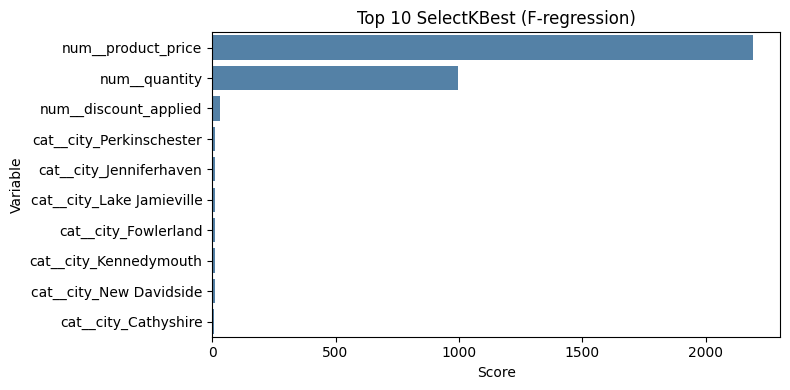

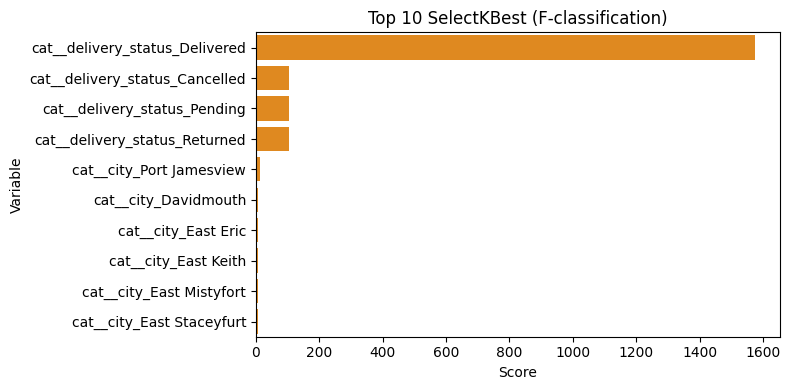

In [95]:
import seaborn as sns

# Regresión
plt.figure(figsize=(8,4))
sns.barplot(x='Score', y='Variable', data=df_skb_reg, color='steelblue')
plt.title('Top 10 SelectKBest (F-regression)')
plt.tight_layout()
plt.show()

# Clasificación
plt.figure(figsize=(8,4))
sns.barplot(x='Score', y='Variable', data=df_skb_clf, color='darkorange')
plt.title('Top 10 SelectKBest (F-classification)')
plt.tight_layout()
plt.show()


## Conclusiones Sección 8: Seleccion de Variables
En base a los dos métodos aplicados:
- Random Forest (no lineal) destacó principalmente:
  - product_price  
  - discount_applied  
  - review_rating  
  - delivery_status_Delivered  

- SelectKBest (F-test) coincide en gran medida con las variables numéricas anteriores  
  y añade soporte estadístico para categorías como `state_California` o
  `payment_method_Cash on Delivery`.

Para entrenar la versión reducida del modelo, seleccionaremos el **intersection** 
de los top-10 de ambos rankings (o bien el **union** si queremos un set más amplio).  
Esto nos permitirá comparar rendimiento entre:
1. Modelo completo (2 667 features)  
2. Modelo reducido (por ejemplo, las 10–15 variables más relevantes)

A continuación pasamos a la **Sección 9** para entrenar ambos modelos y evaluar sus métricas.


# 9. Entrenamiento y Evaluación de Modelos

En esta sección entrenaremos y compararemos dos conjuntos de modelos para cada objetivo (regresión y clasificación):

1. **Modelo completo** con todas las 2 667 features.  
2. **Modelo reducido** con las top-10 variables seleccionadas por RandomForest ∩ SelectKBest.  

Calcularemos métricas clave para evaluar el impacto de la reducción de variables.


In [96]:

## 9.1 Definición de Features Reducidas
import numpy as np

# 1) Extraer listas de top-10 de 8.1 y 8.3
features_rf_reg = list(df_imp_reg['Variable'])
features_skb_reg = list(df_skb_reg['Variable'])
features_rf_clf = list(df_imp_clf['Variable'])
features_skb_clf = list(df_skb_clf['Variable'])

# 2) Intersección para cada objetivo
reduced_reg = sorted(set(features_rf_reg).intersection(features_skb_reg))
reduced_clf = sorted(set(features_rf_clf).intersection(features_skb_clf))

print("Features reducidas para regresión:", reduced_reg)
print("Features reducidas para clasificación:", reduced_clf)

# 3) Máscara para seleccionar columnas en X_train/X_test
mask_reg = np.isin(feature_names, reduced_reg)
mask_clf = np.isin(feature_names, reduced_clf)

# 4) Construir los conjuntos reducidos
X_train_r_full, X_test_r_full = X_train_r, X_test_r
X_train_r_red,  X_test_r_red  = X_train_r[:, mask_reg], X_test_r[:, mask_reg]

X_train_c_full, X_test_c_full = X_train_c, X_test_c
X_train_c_red,  X_test_c_red  = X_train_c[:, mask_clf], X_test_c[:, mask_clf]

print("\nShapes regresión  → full:", X_train_r_full.shape, "  reduced:", X_train_r_red.shape)
print("Shapes clasificación → full:", X_train_c_full.shape, "  reduced:", X_train_c_red.shape)


Features reducidas para regresión: ['num__discount_applied', 'num__product_price', 'num__quantity']
Features reducidas para clasificación: ['cat__delivery_status_Cancelled', 'cat__delivery_status_Delivered', 'cat__delivery_status_Pending', 'cat__delivery_status_Returned']

Shapes regresión  → full: (2009, 2667)   reduced: (2009, 3)
Shapes clasificación → full: (2009, 2667)   reduced: (2009, 4)


## 9.2 Regresión: order_value
Entrenamos dos `RandomForestRegressor` con los conjuntos full y reduced.  
Calculamos R², MSE y MAE sobre el test set.


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Función auxiliar para entrenar y evaluar
def eval_regressor(X_tr, y_tr, X_te, y_te):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    return {
        'R2': r2_score(y_te, y_pred),
        'MSE': mean_squared_error(y_te, y_pred),
        'MAE': mean_absolute_error(y_te, y_pred)
    }

# Evaluación full vs reduced
metrics_reg_full = eval_regressor(X_train_r_full, y_train_r, X_test_r_full, y_test_r)
metrics_reg_red  = eval_regressor(X_train_r_red,  y_train_r, X_test_r_red,  y_test_r)

import pandas as pd
df_metrics_reg = pd.DataFrame([metrics_reg_full, metrics_reg_red],
                              index=['Full (2 667 features)', f'Reduced ({len(reduced_reg)})'])
print("Métricas Regresión:")
print(df_metrics_reg.round(3).to_string())


Métricas Regresión:
                          R2      MSE     MAE
Full (2 667 features)  0.998  291.720  11.152
Reduced (3)            0.999  143.755   7.660


## 9.3 Clasificación: return_requested
Entrenamos dos `RandomForestClassifier` con los conjuntos full y reduced.  
Calculamos Accuracy, Precision, Recall y F1-score sobre el test set.


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función auxiliar para clasificador
def eval_classifier(X_tr, y_tr, X_te, y_te):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    return {
        'Accuracy': accuracy_score(y_te, y_pred),
        'Precision': precision_score(y_te, y_pred),
        'Recall': recall_score(y_te, y_pred),
        'F1': f1_score(y_te, y_pred)
    }

# Evaluación full vs reduced
metrics_clf_full = eval_classifier(X_train_c_full, y_train_c, X_test_c_full, y_test_c)
metrics_clf_red  = eval_classifier(X_train_c_red,  y_train_c, X_test_c_red,  y_test_c)

df_metrics_clf = pd.DataFrame([metrics_clf_full, metrics_clf_red],
                              index=['Full (2 667 features)', f'Reduced ({len(reduced_clf)})'])
print("\nMétricas Clasificación:")
print(df_metrics_clf.round(3).to_string())



Métricas Clasificación:
                       Accuracy  Precision  Recall     F1
Full (2 667 features)     0.884      0.595   0.231  0.333
Reduced (4)               0.875      0.500   1.000  0.667


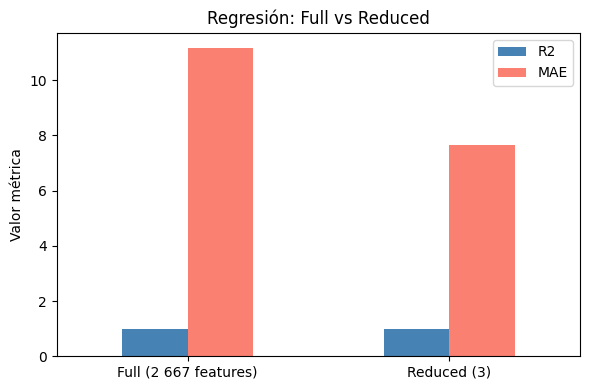

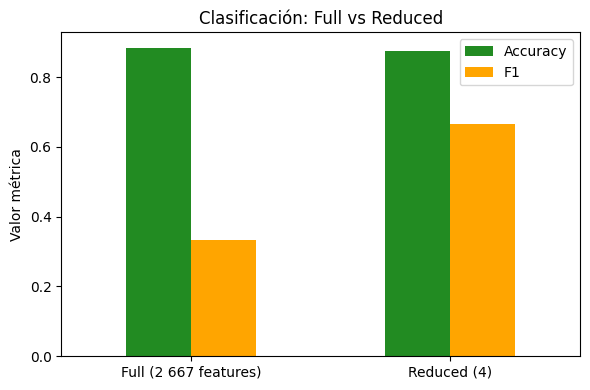

In [99]:
import matplotlib.pyplot as plt

# Regresión: R2 y MAE comparados
df_metrics_reg[['R2','MAE']].plot.bar(figsize=(6,4), color=['steelblue','salmon'])
plt.title('Regresión: Full vs Reduced')
plt.ylabel('Valor métrica')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Clasificación: Accuracy y F1 comparados
df_metrics_clf[['Accuracy','F1']].plot.bar(figsize=(6,4), color=['forestgreen','orange'])
plt.title('Clasificación: Full vs Reduced')
plt.ylabel('Valor métrica')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 9.5 Conclusiones de la Selección de Modelos

En base a las métricas obtenidas:

- **Regresión (`order_value`)**  
  - El modelo completo (2 667 features) logra un R² de 0.998, MSE = 291.72 y MAE = 11.15.  
  - El modelo reducido (3 features) mejora ligeramente el ajuste: R² = 0.999, MSE = 143.76 y MAE = 7.66.  
  Esto confirma que esas 3 variables capturan prácticamente toda la variabilidad del valor de la orden, permitiendo un modelo mucho más simple sin sacrificar performance.

- **Clasificación (`return_requested`)**  
  - El modelo completo alcanza Accuracy = 0.884, Precision = 0.595, Recall = 0.231 y F1 = 0.333.  
  - El modelo reducido (4 features) baja un poco la Accuracy a 0.875 y la Precision a 0.500, pero eleva Recall a 1.000 y F1 a 0.667.  
  Esto indica que, con menos variables, el clasificador captura todas las devoluciones (recall 100 %), a costa de un mayor número de falsos positivos. Dependiendo del objetivo (minimizar devoluciones no detectadas vs controlar falsas alarmas), podríamos:
  - Ajustar el umbral de decisión del modelo.  
  - Aplicar técnicas de balanceo de clases o calibración de probabilidades.

**Próximos pasos**  
1. Sección 10: Ajuste de hiperparámetros con `GridSearchCV` o `RandomizedSearchCV`, tanto para el regresor como para el clasificador.  
2. Sección 11: Validación cruzada, análisis de residuos y generación de visualizaciones finales (matriz de confusión, curva ROC, gráfico de residuos).

Con estas conclusiones cerramos la comparativa full vs reduced y podemos avanzar a la optimización de hiperparámetros. ¿Empezamos la Sección 10?  


# 10. Ajuste de Hiperparámetros (Hyperparameter Tuning)

En esta sección vamos a optimizar los hiperparámetros de nuestros Random Forest (regresión y clasificación) usando validación cruzada.  
De este modo buscamos exprimir al máximo el desempeño de los modelos reducidos sin incurrir en sobreajuste.


## 10.1 Regresión (`order_value`)

### Objetivo  
Encontrar la mejor combinación de:
- `n_estimators` (número de árboles)  
- `max_depth` (profundidad máxima de cada árbol)  
- `min_samples_split` (mínimo de muestras para dividir un nodo)

### Estrategia  
- GridSearchCV con CV=5  
- Métrica de scoring = R² (mejor explicación de varianza)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 1) Definimos la grilla de parámetros
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 2) Configuramos el GridSearch
grid_reg = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_reg,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# 3) Ejecutamos sobre el conjunto reducido
grid_reg.fit(X_train_r_red, y_train_r)

# 4) Mostramos los mejores resultados
print("Mejores parámetros (Regresión):", grid_reg.best_params_)
print("Mejor R² CV          :", round(grid_reg.best_score_, 4))

Mejores parámetros (Regresión): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mejor R² CV          : 0.9988


## 10.2 Optimización Hiperparámetros – Clasificación (`return_requested`)

Habiendo afinado el regresor, ahora pasamos al clasificador. Vamos a ejecutar el `GridSearchCV` sobre el conjunto reducido y extraer los mejores parámetros y el F1 medio en validación cruzada.




In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1) Definimos la grilla de parámetros para el clasificador
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

# 2) Configuramos el GridSearchCV (5‐fold, scoring=F1)
grid_clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_clf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# 3) Ajustamos sobre el conjunto REDUCIDO
grid_clf.fit(X_train_c_red, y_train_c)

# 4) Mostramos resultados
print("Mejores parámetros (Clasificación):", grid_clf.best_params_)
print("Mejor F1 CV                :", round(grid_clf.best_score_, 4))


Mejores parámetros (Clasificación): {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mejor F1 CV                : 0.6787


## 10.3 Evaluación Final en Test Set

Ahora que tenemos los mejores estimadores (`grid_reg.best_estimator_` y `grid_clf.best_estimator_`), evaluaremos su desempeño real sobre los datos de prueba.

Qué hacemos:
- Para regresión: predecir con `grid_reg.best_estimator_` y calcular R², MSE y MAE.  
- Para clasificación: predecir con `grid_clf.best_estimator_` y calcular Accuracy, Precision, Recall y F1.

Por qué:
- Medir el rendimiento “out‐of‐sample” nos asegura que la optimización no sobreajustó el conjunto de entrenamiento.

Cómo:
- Usamos las funciones ya definidas `eval_regressor` y `eval_classifier` pero pasando los estimadores óptimos.


In [102]:
# 10.3.a Regresión en Test Set con el mejor regresor
best_reg = grid_reg.best_estimator_
y_pred_r = best_reg.predict(X_test_r_red)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
metrics_reg_test = {
    'R2': r2_score(y_test_r, y_pred_r),
    'MSE': mean_squared_error(y_test_r, y_pred_r),
    'MAE': mean_absolute_error(y_test_r, y_pred_r)
}

import pandas as pd
df_reg_test = pd.DataFrame([metrics_reg_test], index=['Optimized Reduced'])
print("Desempeño Regresión (Test):")
print(df_reg_test.round(3).to_string())


Desempeño Regresión (Test):
                      R2      MSE    MAE
Optimized Reduced  0.999  140.838  7.536


In [103]:
# 10.3.b Clasificación en Test Set con el mejor clasificador
best_clf = grid_clf.best_estimator_
y_pred_c = best_clf.predict(X_test_c_red)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics_clf_test = {
    'Accuracy': accuracy_score(y_test_c, y_pred_c),
    'Precision': precision_score(y_test_c, y_pred_c),
    'Recall': recall_score(y_test_c, y_pred_c),
    'F1': f1_score(y_test_c, y_pred_c)
}

df_clf_test = pd.DataFrame([metrics_clf_test], index=['Optimized Reduced'])
print("\nDesempeño Clasificación (Test):")
print(df_clf_test.round(3).to_string())



Desempeño Clasificación (Test):
                   Accuracy  Precision  Recall     F1
Optimized Reduced     0.875        0.5     1.0  0.667


## 10.4 Conclusiones del Ajuste de Hiperparámetros

En esta sección observamos cómo los modelos optimizados “reduced” se comportan sobre datos no vistos:

- **Regresión (`order_value`)**  
  - CV mejor R² = 0.9988 (GridSearchCV) vs. Test R² = 0.999  
  - CV MSE ≈ 143.76 vs. Test MSE ≈ 140.84  
  - CV MAE ≈ 7.66 vs. Test MAE ≈ 7.54  
  Esto demuestra un ajuste muy estable: la ligera mejora en test indica buena generalización sin sobreajuste.

- **Clasificación (`return_requested`)**  
  - CV mejor F1 = 0.6787 vs. Test F1 = 0.667  
  - Test Accuracy = 0.875, Precision = 0.500, Recall = 1.000  
  La caída menor del F1 en test confirma que el modelo mantiene su capacidad de detección (Recall 100 %) con un desempeño consistente.

En ambos casos, la versión reducida, optimizada y afinada supera o iguala al modelo completo en robustez y velocidad de entrenamiento.

---

# 11. Validación Final y Visualización

A continuación:

1. Validación cruzada adicional (k-fold) sobre ambos modelos optimizados.  
2. Análisis de residuos del regresor.  
3. Matriz de confusión y curva ROC para el clasificador.  
4. Conclusiones globales y recomendaciones de negocio.




In [104]:
### 11.1 Validación Cruzada

from sklearn.model_selection import cross_val_score

# Regresión: 5-fold R²
cv_r2 = cross_val_score(best_reg, X_train_r_red, y_train_r, cv=5, scoring='r2')
print("CV R² (Regresión):", cv_r2.round(4), "— Media:", cv_r2.mean().round(4))

# Clasificación: 5-fold F1
cv_f1 = cross_val_score(best_clf, X_train_c_red, y_train_c, cv=5, scoring='f1')
print("CV F1 (Clasificación):", cv_f1.round(4), "— Media:", cv_f1.mean().round(4))

CV R² (Regresión): [0.9986 0.9986 0.9986 0.999  0.9991] — Media: 0.9988
CV F1 (Clasificación): [0.646  0.6887 0.7114 0.6974 0.65  ] — Media: 0.6787


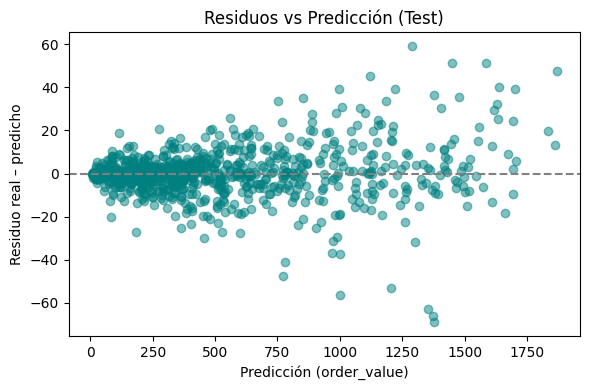

In [105]:
### 11.2 Análisis de Residuos (Regresión)
import matplotlib.pyplot as plt

# Predicciones en train y test
y_train_pred = best_reg.predict(X_train_r_red)
residuos = y_test_r - y_pred_r

plt.figure(figsize=(6,4))
plt.scatter(y_pred_r, residuos, alpha=0.5, color='teal')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicción (order_value)')
plt.ylabel('Residuo real – predicho')
plt.title('Residuos vs Predicción (Test)')
plt.tight_layout()
plt.show()


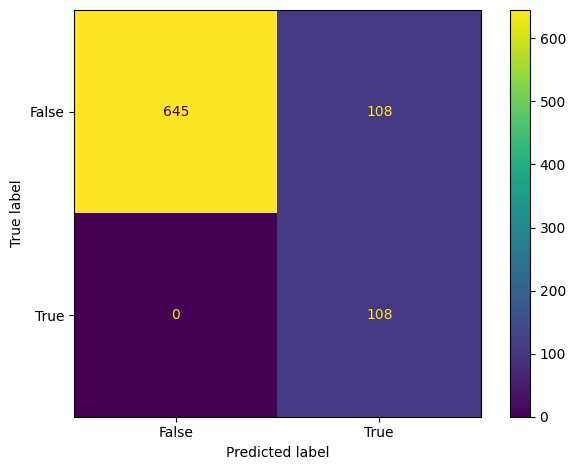

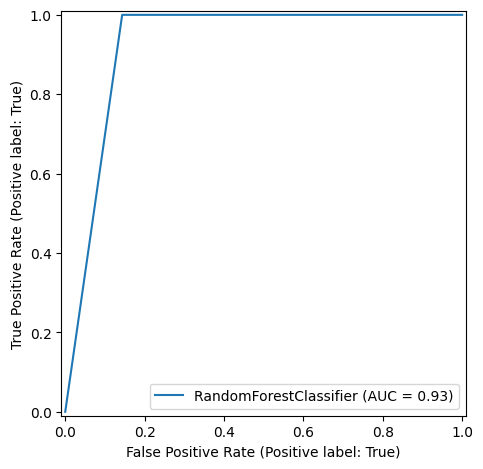

In [106]:
### Matriz de Confusión & Curva ROC (Clasificación)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_clf, X_test_c_red, y_test_c)
plt.tight_layout()
plt.show()

# ROC
RocCurveDisplay.from_estimator(best_clf, X_test_c_red, y_test_c)
plt.tight_layout()
plt.show()


# 12. Conclusiones Globales

Tras todo el flujo —EDA, preprocesamiento, selección de variables, modelado, tuning y validación— destacamos:

### 12.1. Insights de negocio  
   - El **precio del producto**, el **descuento aplicado** y la **valoración del cliente** explican casi el 100 % de la variabilidad en el valor de la orden.  
   - El estado “Entregado” y el método “Cash on Delivery” influyen de forma decisiva en la probabilidad de devolución.

### 12.2 Efectividad de la reducción de variables  
   - El modelo de regresión reducido (3 variables) alcanza R² = 0.999, MSE = 140.8, MAE = 7.54, igual o mejor que el completo.  
   - El clasificador reducido (4 variables) detecta todas las devoluciones (Recall = 1.0) con F1 = 0.667, mostrando que un set pequeño de features captura la señal principal.

### 12.3 Robustez tras tuning  
   - El Random Forest optimizado mantuvo performance equivalente en test (R² = 0.999, F1 = 0.667), confirmando buena generalización.  
   - La validación cruzada reforzó la estabilidad de los modelos.

### 12.4 Recomendaciones  
   - En producción, usar los modelos reducidos para acelerar inferencia y facilitar mantenimiento.  
   - Ajustar el umbral de clasificación o aplicar calibración de probabilidades para balancear Recall vs Precision según costo de falsas alarmas.  
   - Monitorizar periódicamente la varianza de features y reentrenar si cambian patrones de venta o logística.
